# Java Script code to download images url from google SERP.



var urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
var hiddenElement = document.createElement('a');
hiddenElement.href = 'data:text/csv;charset=utf-8,' + encodeURI(urls.join('\n'));
hiddenElement.target = '_blank';
hiddenElement.download = 'images.csv';
hiddenElement.click();

#Importing fastai

In [0]:
from fastai.vision import *

In [0]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [0]:
!cp cobra.csv /content/cobra.csv

cp: cannot stat 'cobra.csv': No such file or directory


In [0]:
!cp mamba.csv /content/mamba.csv

cp: cannot stat 'mamba.csv': No such file or directory


In [0]:
!cp python.csv /content/python.csv

cp: cannot stat 'python.csv': No such file or directory


In [0]:
!cp viper.csv /content/viper.csv

cp: cannot stat 'viper.csv': No such file or directory


In [0]:
path = Path('/content/images/')

## Download images

In [0]:
for file, folder in [('viper.csv', 'viper'), ('python.csv', 'python'), 
                     ('mamba.csv', 'mamba'), ('cobra.csv', 'cobra')]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=200)

## Verify images

In [0]:
doc(verify_images)

In [0]:
for folder in ('viper', 'python','mamba', 'cobra'):
    print(folder)
    verify_images(path/folder, delete=True, max_size=500)

viper


python


mamba


cobra


## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['cobra', 'mamba', 'python', 'viper']

In [0]:
doc(data.show_batch)

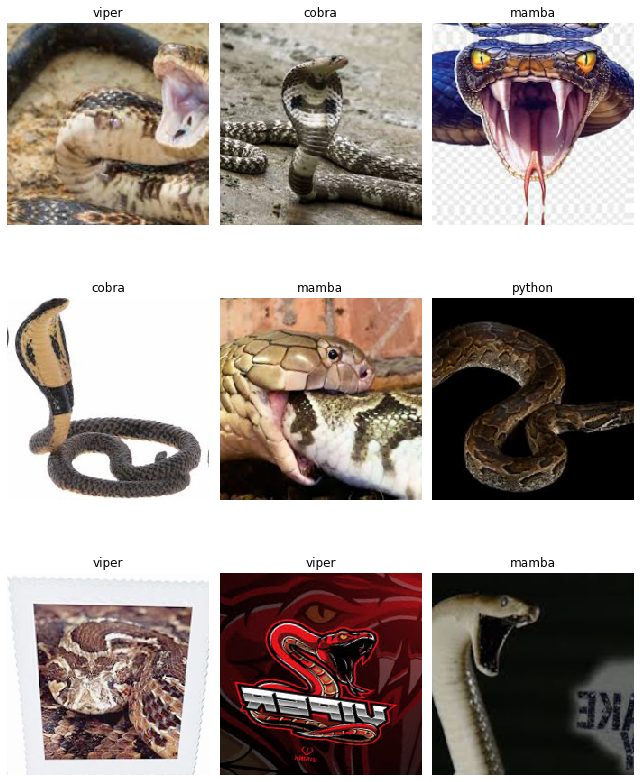

In [0]:
data.show_batch(rows=3, figsize=(9, 12))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cobra', 'mamba', 'python', 'viper'], 4, 448, 112)

## Initial training

In [0]:
from fastai.metrics import error_rate # 1 - accuracy
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (448 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
viper,viper,viper,viper,viper
Path: /content/images;

Valid: LabelList (112 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
mamba,mamba,cobra,viper,mamba
Path: /content/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [0]:
doc(learn.fit_one_cycle)

In [0]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.261719,1.436046,0.401786,00:06
1,1.540391,1.218708,0.276786,00:06
2,1.195309,1.057196,0.223214,00:06
3,0.987185,0.976511,0.241071,00:06


In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [1]:
learn.recorder.plot(suggestion=True)

NameError: ignored

In [0]:
learn.fit_one_cycle(4, max_lr=slice(2.5e-4, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.501062,0.914140,0.241071,00:06
1,0.399690,1.250963,0.267857,00:06
2,0.338052,1.217749,0.241071,00:06
3,0.274967,1.125681,0.241071,00:06


In [0]:
learn.save('stage-1')

## Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

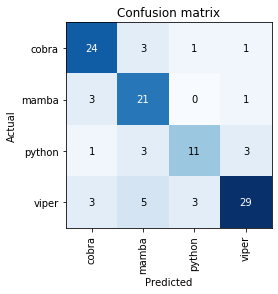

In [0]:
interp.plot_confusion_matrix()

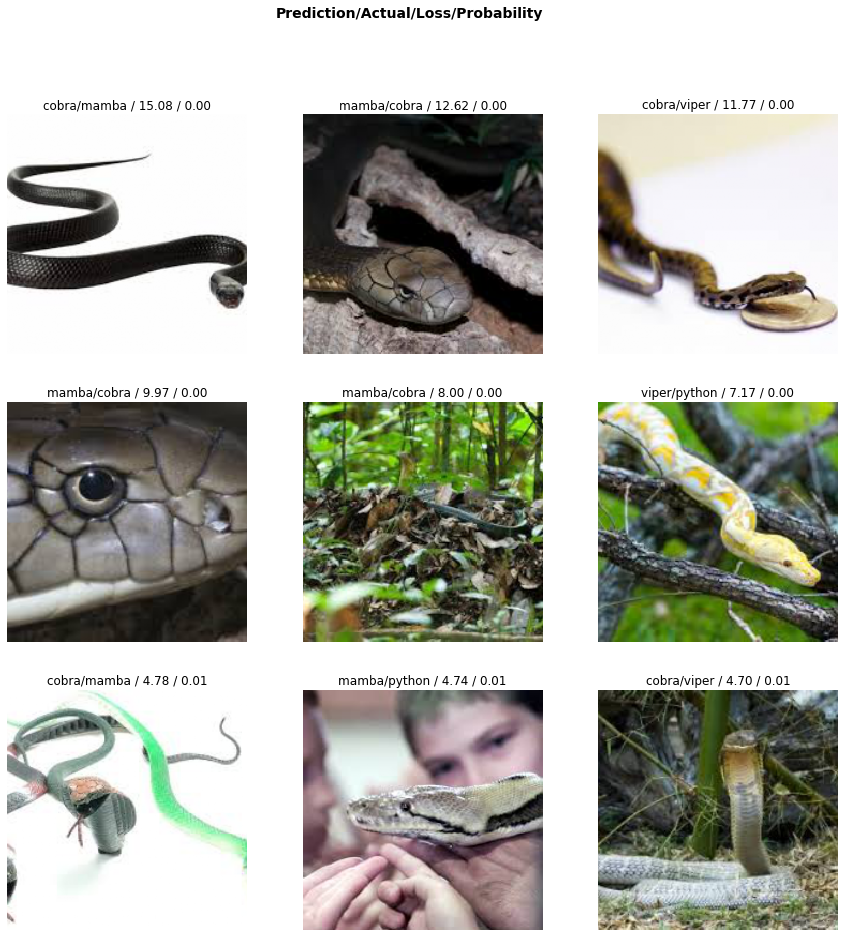

In [0]:
interp.plot_top_losses(9, figsize=(15,15))

#putting model into production

In [0]:
learn.export()

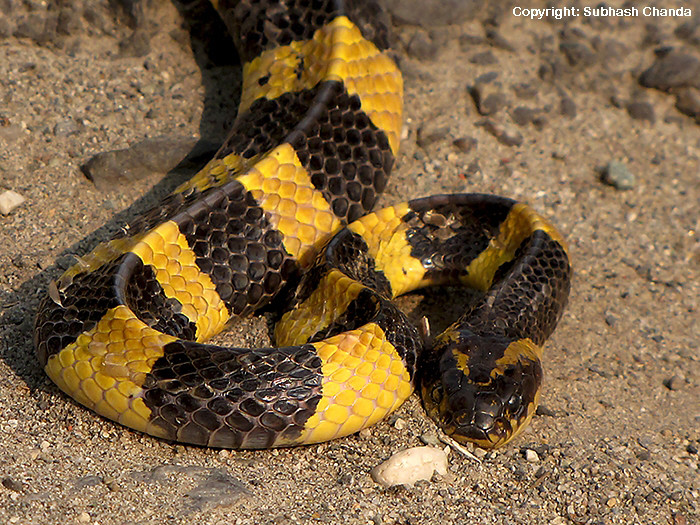

In [0]:
img = open_image('/content/unidentified-snake.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category viper